## **MA5606 Tópicos Matemáticos en Aprendizaje de Máquinas, Redes Neuronales y Aprendizaje Profundo**

### **Tarea 2: Algoritmos de entrenamiento y aproximación de esperanzas condicionales**

**Profesores: Claudio Muñoz y Joaquín Fontbona**

**Auxiliares: Javier Maass y Diego Olguín**

**Nombres integrantes: COMPLETAR**



**Instrucciones:**

- **Fecha de entrega:** **31 de mayo de 2024, a las 23:59.**

- **Importante:** Si trabaja desde el link de Google Colab debe hacer un copia en su Drive antes de trabajar, de lo contrario se podrían no guardar sus códigos.

- Debe entregar un Jupyter Notebook (archivo .ipynb) con sus código en Python. Le pueden ser de mucha utilidad los códigos vistos en la actividad práctica.

- Sus códigos deben estar comentados y ordenados. Además, en formato texto debe colocar todas sus conclusiones y resultados pedidos que deban ser redactados.

- En todos los ejercicios se le pide hacer al menos un gráfico. Los gráficos que realicen deben ser claros, con títulos y nombres en los ejes, junto con leyendas si es que corresponde.

#### **Ejercicio 1: Algoritmo Adam**

En el presente [artículo](https://arxiv.org/abs/1412.6980) se introduce el algoritmo de optimización estocástica Adam (por Adaptative Moment Estimation), el objetivo de este ejercicio es implementar dicho algoritmo y utilizarlo para entrenar redes neuronales, para ello se explorarán todos los detalles de implementación de una red neuronal, con ciertas simplificaciones.

Utilizaremos Adam para entrenar una red neuronal de 1 capa oculta de $\mathbb{R}$ en $\mathbb{R}$, de ancho $N$, con su realización dada por

$$ \Phi_\theta (x) = W_2 \cdot \sigma (W_1 \cdot x + b_1) + b_2 $$

Consideraremos $\sigma(x) = \text{tanh}(x)$ y $\theta = (W_1, b_1, W_2, b_2)$, $W_1 \in \mathbb{R}^{N \times 1}$, $b_1 \in \mathbb{R}^{N}$, $W_2 \in \mathbb{R}^{1 \times N}$, $b_2 \in \mathbb{R}$. En este caso codificaremos, los parámetros del sistema en un vector de $\mathbb{R}^{3N + 1}$ dado por

$$ \theta = (W_1, b_1, W_2, b_2)^T $$

Esto no es lo que hacen las librerías de aprendizaje profundo en la realidad, pero en este caso permite simplificar mucho los manejos de estructuras de datos utilizadas.

Para lo que sigue utilizaremos la librería ``autograd`` (instalada ya en Google Colab) que facilitará implementar la diferenciación automática (utilizada en las librerías más importantes de *deep learning*) para calcular facilmente el gradiente de la función de pérdida. Esta librería sobrescribe la librería ``numpy`` por lo que ahora utilizaremos esa librería con el sobrenombre ``np`` como si fuese la librería original.

In [48]:
# Numpy de autograd
import autograd.numpy as np

# Función de gradiente mediante diferenciación automática
from autograd import grad

# Para graficar
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'autograd'

Buscaremos ajustar la red neuronal a datos *sampleados* desde una función $\text{cos}(x)$ con cierto ruido gaussiano. Generemos los datos antes de empezar el ejercicio.

In [ ]:
# Función a aproximar
def f_true(x):
    return np.cos(x)

In [ ]:
xdim = 1   # Dimensión de input
Ndata = 20 # Cantidad de datos a samplear
ydim = 1   # Dimensión de output

In [ ]:
# Datos aleatorios
x_train = np.random.random((xdim, Ndata))

# Sampleo de datos
desv = 3e-2
y_train = f_true(x_train) + desv*np.random.randn(*x_train.shape)

plt.figure(figsize=(8,6))
plt.scatter(x_train.flatten(), f_true(x_train).flatten(), label="Original")
plt.scatter(x_train.flatten(), y_train.flatten(), label="Ruidosa")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos de entrenamiento con y sin ruido")
plt.legend()
plt.show()

#### **Ejercicio 1.1: Creación de una red neuronal de 1 capa oculta**

Cree una función en Python ``net(params, x)`` que dados los parámetros codificados en un arreglo de ``numpy`` tal como se mostró arriba y un conjunto de datos $x \in \mathbb{R}^{1 \times N_{data}}$ calcule el output de la red. Pruebe su función con parámetros inicializados aleatoriamente desde una uniforme estándar y el arreglo ``x_train`` creado antes.

In [ ]:
# Tu código aquí, pueden generar todas las celdas de código que gusten

#### **Ejercicio 1.2: Creación de la función de pérdida por *batches***

La naturaleza estocástica del algoritmo proviene de que no se le entregan todos los datos de entrenamiento, sino que una muestra diferente en cada iteración de entrenamiento, dichas muestras las denotaremos *batches*. Implemente una función en Python ``loss(params)`` que dados unos parámetros ``params`` $\theta$ haga lo siguiente:

* Obtenga un subarreglo de tamaño $(1, N_{batches})$ de ``x_train`` de manera aleatoria y sin sustitución, digamos ``x_batch``.
* Obtenga el ``y_batch`` correspondiente.
* Calcule la pérdida cuadrática en este *batch*:

$$ L(\theta) = \sum_{i=1}^{N_{batch}} (y_i - \Phi_\theta (x_i))^2 $$

Y donde se entiende que hay una reindexación para sumar sobre todo el *batch*.

In [ ]:
# Tu solución aquí

#### **Ejercicio 1.3: Cálculo del gradiente vía autodiferenciación y comparación con diferencias finitas**

Con la función ``grad`` de ``autograd`` calcule el gradiente de la función de pérdida antes creada, con tamaño de *batch* igual a ``Ndata``, es decir, la función de pérdida se vuelve determinista en este caso (ya que le pasamos todos los datos al tomar los batches sin sustitución. Compare en norma este gradiente con el cálculado mediante por diferencias finitas centradas

$$ \frac{\partial L}{ \partial \theta_j} (\theta) \approx \frac{L(\theta + \varepsilon e_j) - L(\theta - \varepsilon e_j)}{2 \varepsilon} $$

Para $\varepsilon \in \{ 10, 1, 0.1, 0.01 \}$, evaluado los gradientes en los mismo parámetros utilizados en la parte anterior.

In [ ]:
# Tu solución aquí

#### **Ejercicio 1.4: Implementación de Adam**

Vuelva a calcular el gradiente de la función de pérdida, pero ahora utilizando un tamaño de batch de $5$ (ahora sí se vuelve aleatoria la función de pérdida). Utilice 10000 iteraciones para el algoritmo y los mismos parámetros $\alpha, \beta_1, \beta_2, \varepsilon$ del artículo original. Grafique la evolución de la función de pérdida a través de las iteraciones en escala log-log (escala logarítmica en ambos ejes) y el resultado de la red en contraste con los datos y la función sin ruido evaluada en los puntos de entrenamiento.

In [ ]:
# Tu código aquí

### **Ejercicio 2: Aproximación de esperanzas condicionales vía redes neuronales**

Sean $X$, $Y$ variables aleatorias y $f$ una función continua, luego es sabido de clases que el problema de encontrar una función que minimice el error cuadrático medio

$$  \min_{f} \mathbb{E} [(Y - f(X))^2] $$

Viene dado por

$$ f(x) = \mathbb{E} [Y \, | \, X = x] $$

El objetivo de este ejercicio es ver numéricamente como una red neuronal entrenada para minimizar el error cuadrático medio de una muestra de puntos $\{x_i, y_i \}$ tales que $f(x_i ) = y_i$, con $f$ desconocida, en realidad se aproxima a la esperanza condicional con $X$ e $Y$ tales que $x_i \sim X$, $y_i \sim Y$.

Para este ejercicio consideremos $X$ con ley $\text{Unif}(-1,1)$, la función que buscamos aproximar será

$$ f(x) = e^{-2 x^2}$$

Y la ley de $Y$ supongamos que es $f(X) \, + \, \text{N}(0, 0.1^2)$.

#### **Ejercicio 2.1: Generar datos de entrenamiento**

Samplee 100 puntos de la ley de $X$ dada antes y con ello obtenga 100 muestras aleatorias correspondientes de $Y$.

/var/folders/vl/sstvv2kj5ydgfftm30fx_db00000gn/T/ipykernel_15760/2915735582.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


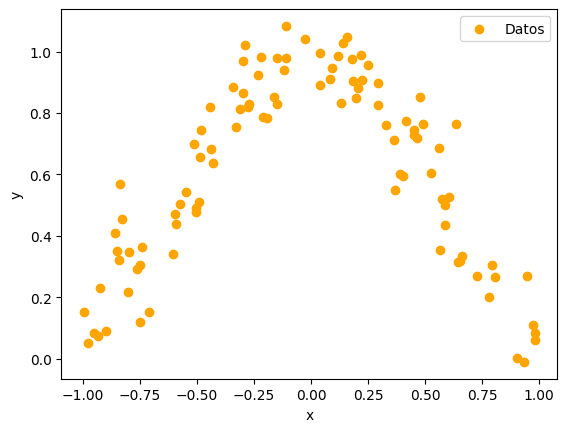

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N_samples = 100
std = 0.1

# Sampleo de puntos aleatorios entre -1 y 1:
x = np.random.uniform(-1, 1, N_samples)

# Evaluando en Y para obtener las muestras correspondientes:
y = np.exp(-2*x**2) + np.random.normal(0, std, N_samples)

# Graficando los datos:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, label='Datos', color='orange')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
fig.show()

#### **Ejercicio 2.2: Cálculo de la esperanza condicional vía Montecarlo**

En este caso como es sabida la ley de $Y$ vía la función $f$ (en la realidad todo esto es desconocido) se puede calcular la esperanza condicional vía método de Montecarlo. Cree una función en Python que dado un $x \in [-1, 1]$ y una cantidad de muestras para la aproximación de Montecarlo, digamos $M$, calcule

$$ \mathbb{E} [Y \, | \, X = x] \approx \hat f = \frac{1}{M} \sum_{j=1}^M f(x) + w_j $$

Donde los $w_j$ vienen sampleados desde una $N(0, 0.1^2)$. Realice 3 gráficos de $\hat f$ en $[-1, 1]$ uno utilizando $M=10$, $M=100$, $M=1000$ ¿qué observa cuando $M$ aumenta?

/var/folders/vl/sstvv2kj5ydgfftm30fx_db00000gn/T/ipykernel_15760/198460732.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


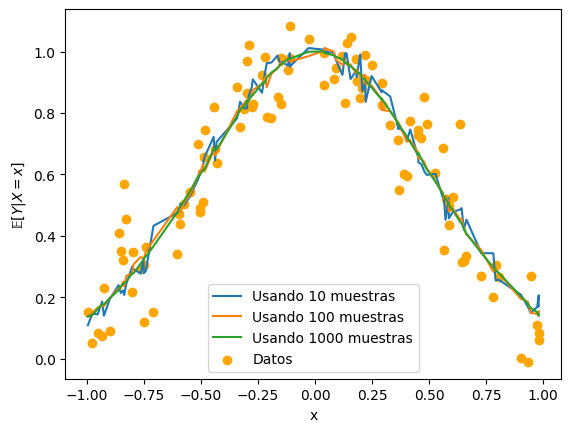

In [7]:
def montecarlo(x, n_samples):
    x_len = len(x)
    return np.exp(-2*x**2) + np.mean(np.random.normal(0, std, (n_samples, x_len)), axis=0) # Aquí saqué de la suma f(x).

# Graficamos:
fig = plt.figure()
ax = fig.add_subplot(111)
sorted_x = np.sort(x)
for n_samples in [10, 100, 1000]:
    ax.plot(sorted_x, montecarlo(sorted_x, n_samples), label=f'Usando {n_samples} muestras')
ax.scatter(x, y, label='Datos', color='orange')
ax.set_xlabel('x')
ax.set_ylabel(r'$\mathrm{\mathbb{E}}[Y | X=x]$')
ax.legend()
fig.show()

#### Obs HAY QUE RELLENAR ACÁ:
A medida que M aumenta, la aproximación de la esperanza condicional converge a f(x).

#### **Ejercicio 2.3: Observando la aproximación de una red neuronal**

Entrene una red neuronal de una sola capa oculta con pérdida cuadrática para que ajuste a los datos que usted generó en el ejercicio 2.1, puede utilizar la función de pérdida y el ancho que más le acomode (o que mejores resultados le entregue). Grafique la predicción de la red neuronal en $[-1, 1]$ y compare con el resultado del ejercicio 2.2.

*Indicación: Puede utilizar el código creado en el ejercicio 1, o bien, utilizar alguna librería como Pytorch, Tensorflow, etc.*

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

try:
    from tqdm import tqdm 
    tqdm_is_available = True
except:
    tqdm_is_available = False

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self, dim_input, dim_output, n_layers, layer_width, activation, **layer_kwargs) -> None: 
        super().__init__()
        # Se crean las capas internas
        if n_layers == 0:
            raise ValueError("n_layers debe ser mayor a 0 (o sino sería una red sin llamadas a la función de activación)")
        if type(layer_width) == list:

            assert len(layer_width) == n_layers, "El largo de layer_width, como lista, debe ser igual a n_layers"
            self.first_layer = nn.Linear(dim_input, layer_width[0], **layer_kwargs)
            self.inner_layers = nn.ModuleList([nn.Linear(layer_width[n], layer_width[n+1], **layer_kwargs)
                                           for n in range(n_layers-1)])
            self.last_layer = nn.Linear(layer_width[-1], dim_output, **layer_kwargs)
        else:
            self.first_layer = nn.Linear(dim_input, layer_width, **layer_kwargs)
            self.inner_layers = nn.ModuleList([nn.Linear(layer_width, layer_width, **layer_kwargs)
                                           for n in range(n_layers-1)])
            self.last_layer = nn.Linear(layer_width, dim_output, **layer_kwargs)
        self.activation = activation

    # Función de forward, que dado un input calcula el output de la red
    def forward(self, input):
        input = self.activation(self.first_layer(input))
        for layer in self.inner_layers:
            input = self.activation(layer(input)) # Efecto de activación

        return self.last_layer(input)

In [4]:
def loss_func(network_output, data):
    """
    Función de pérdida cuadrática media (MSE).

    Args:
        network_output (torch.Tensor): La salida de la red neuronal.
        data (torch.Tensor): Los datos de salida reales.

    Returns:
        torch.Tensor: El valor de la pérdida cuadrática media.
    """
    return F.mse_loss(network_output, data) # Pérdida cuadrática media

def closure():
    """
    Función de cierre utilizada en el optimizador.

    Esta función realiza los siguientes pasos:
    1. Pone a cero los gradientes del optimizador.
    2. Calcula la salida del modelo.
    3. Calcula la pérdida entre la salida del modelo y los datos reales.
    4. Realiza la diferenciación automática (backpropagation).

    Returns:
        torch.Tensor: El valor de la pérdida.
    """
    optimizer.zero_grad() # Se actualizan los pesos haciendo gradiente 0
    output = model(x_data)
    loss = loss_func(output, y_data) # Se calcula la función de pérdida
    loss.backward() # Diferenciación automática
    return loss

# Definimos el modelo
model = NeuralNetwork(dim_input=1, dim_output=1, n_layers=1, layer_width=100, activation=F.tanh, dtype=torch.double)
optimizer = optim.Adam(model.parameters())

# Pasamos los datos a formato de torch
x_data = torch.tensor(x, dtype=torch.double).unsqueeze(1)
y_data = torch.tensor(y, dtype=torch.double).unsqueeze(1)

# Entrenamiento
n_iters = 1000
loss_record = []

for i in tqdm(range(n_iters)) if tqdm_is_available else range(n_iters):
    loss_record.append(loss_func(model(x_data), y_data).item()) # Esto en verdad no es eficiente, pues loss ya está siendo calculada en closure.
    optimizer.step(closure)

# Graficamos la pérdida
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(loss_record)
ax.set_yscale('log')
ax.set_xlabel('Iteración')
ax.set_ylabel('Pérdida')


NameError: name 'x' is not defined

In [1]:
# Graficamos el resultado:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, label='Datos', color='orange')
ax.plot(sorted_x, model(torch.tensor(sorted_x).unsqueeze(1)).detach().numpy(), label='Predicción', color='blue')
ax.plot(sorted_x, montecarlo(sorted_x, 100), label='Montecarlo', color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
fig.show()

NameError: name 'plt' is not defined

#### Investigar sobre data loaders

#### Pedirle la tarea (no de este ramo ojo equipo docente) al agu